## Load data

First, you'll load up a DataFrame with some data.

In [ ]:
# To keep the page organized, do all imports here
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# Use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [ ]:
students_df = pd.read_sql_table('studentsperformance', con=engine)

# Remove the connection
engine.dispose()

students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Before you go on, use the techniques from the previous lesson to explore this dataset so that you understand the basic data schema.


## Understanding distribution with histograms 

The histogram can help you quickly analyze a variable's distribution. Take a look at how math, reading, and writing scores are distributed in student performance data.

In [ ]:
students_df[['math score', 'writing score', 'reading score']].describe()

,math score,writing score,reading score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.054000,69.169000
std,15.16308,15.195657,14.600192
min,0.00000,10.000000,17.000000
25%,57.00000,57.750000,59.000000
50%,66.00000,69.000000,70.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


You can see that math has a mean of `66`. Next, make a histogram to visualize this data.

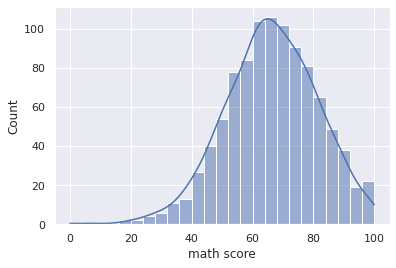

In [ ]:
ax = sns.histplot(students_df['math score'], kde=True)

Seaborn generates a lot automatically. The name of the Series was used to create a label for the x-axis. A kernel density estimate (KDE), which estimates the probability density, was plotted along with the histogram. And the number of bins was estimated automatically using a built-in formula. But you have control over these things if you want to change them.

The `histplot()` function makes a good guess at the right number of bins to use, but increasing or decreasing the number may reveal features of the data. It may be instructive to experiment by plotting the histogram with a different number of bins. For example, you could draw a histogram for reading score using 20 bins:


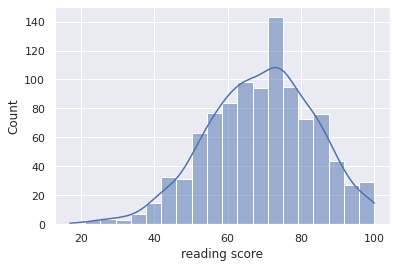

In [ ]:
ax = sns.histplot(students_df['reading score'], bins=20, kde=True)

You can remove the KDE by setting `kde` to `false`. Or you can just remove it, because it is `false` by default. The following statement has removed it.

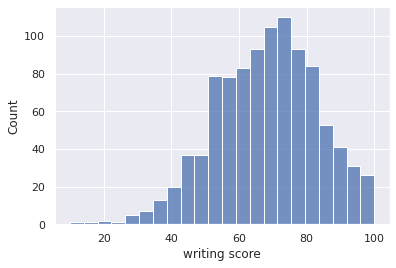

In [ ]:
ax = sns.histplot(students_df['writing score'])

## Scatter plots: Comparing the distribution of two variables

Next, visualize the relationship between two variables. Here, what you want is a scatter plot; for that, use  the `scatterplot()` function. Now, compare math and reading scores:

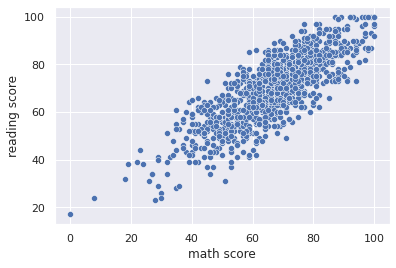

In [ ]:
sns.scatterplot(x="math score", y="reading score", data=students_df)

In a scatter plot, one variable is plotted on the x-axis and the other on the y-axis. It may be immediately obvious that as the math score increases, the reading score also increases. One explanation here might be that students who are good at math are also better at reading, or vice versa. Or, you might think that what's really at stake is that schools that have high reading scores also tend to have high writing scores, because they have sufficient resources. 

Suppose that you wanted to see how this distribution works across a gender variable. You could group the data by gender and generate a scatter plot by telling seaborn which categorical column to use.


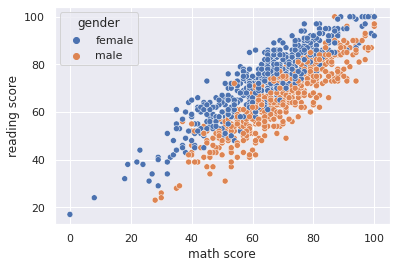

In [ ]:
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)

It looks like females are scoring higher in reading than the males. You will further explore this in another type of plot shortly.

Does the type of lunch have any effect on the score? You can vary the type of markers as well as the colors used, which can show grouping by two different variables.

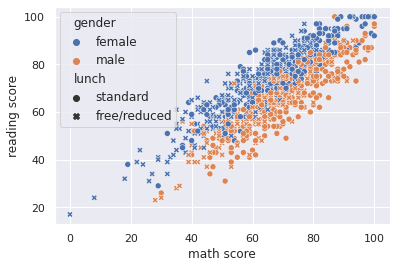

In [ ]:
sns.scatterplot(x="math score", y="reading score", hue="gender", style="lunch",  data=students_df)

You can even vary the size of the markers to show another variable. The visualization below explores whether completion of the preparation course matters.

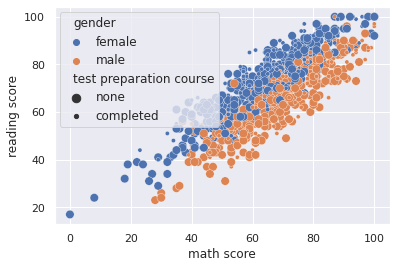

In [ ]:
sns.scatterplot(x="math score", y="reading score", hue="gender", size="test preparation course",  data=students_df)

It's possible to combine the histogram and the scatter plot to see both the individual distributions as well as the relative distributions on the same graph.

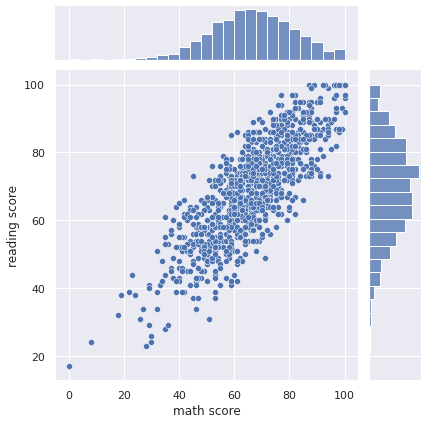

In [ ]:
sns.jointplot(x="math score", y="reading score", data=students_df)

To plot multiple distributions in the dataset, use the `pairplot()` function. It will compare all variables against each other in a matrix of plots.

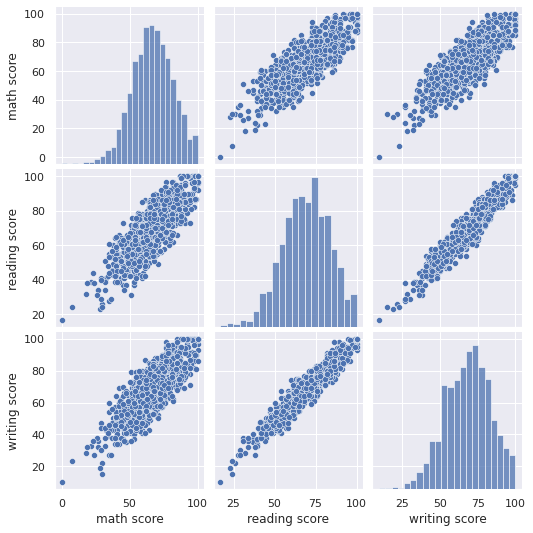

In [ ]:
sns.pairplot(students_df)

You can see strong correlations between the three scores.

Next, examine distributions with respect to categories. In the scatter plots above, the plots became progressively harder to interpret as you added categorical variables. Instead, you could use a box plot to compare these variables by category.

## Box plots

Box plots visually illustrate the distribution of values in a category. In a box plot, the median and upper and lower quartiles are clearly shown, as well as the maximum and minimum. Two or more samples may be compared using the box plot.

![](assets/python4_visualizations_01-v2.png)

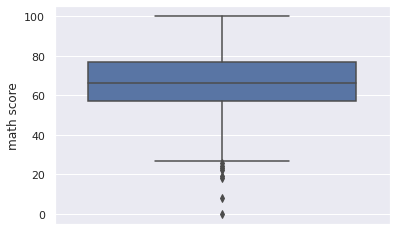

In [ ]:
sns.boxplot(y="math score", data=students_df)

How are math scores distributed across genders?

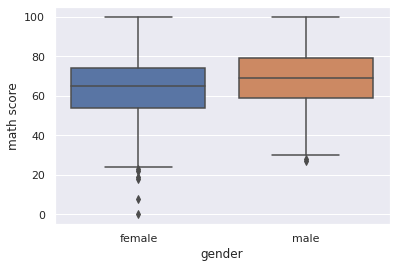

In [ ]:
sns.boxplot(y="math score", x="gender", data=students_df)

How are math scores affected by parent education and gender? To properly display the labels on the x-axis, you will have to rotate them.

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

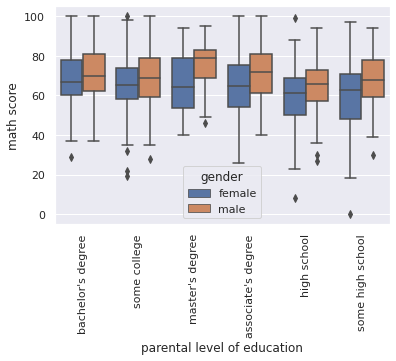

In [ ]:
ax = sns.boxplot(y="math score", hue="gender", x = "parental level of education", data=students_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

With the box plot, it's easier to compare the means of the various categories and the range of values. There doesn't seem to be any significant difference in parental level of education. Maybe the preparation course makes a difference? Take a look at that variable. If you want to see the gender, lunch, and test preparation course variables in one plot, then a categorical plot might be a good choice. For this, use the `catplot()` function.

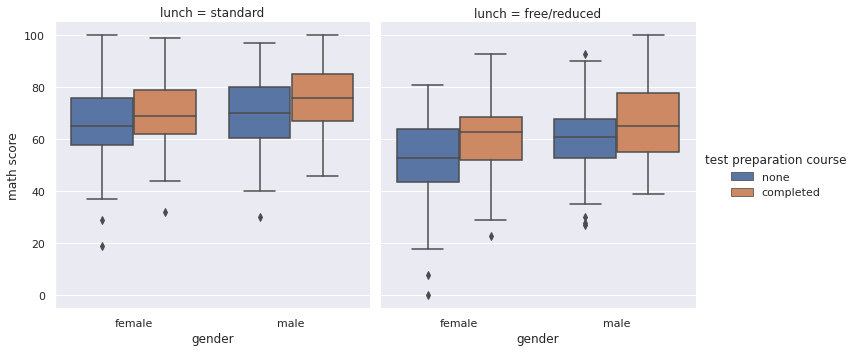

In [ ]:
sns.catplot(y="math score", x="gender", hue = "test preparation course", col="lunch",
            kind="box", data=students_df)

Now you get some interesting results. It's clear that the students who completed the test preparation course scored higher than those who did not. There also seems to be a small advantage to the standard lunch over the reduced lunch.